## `Team members:` 
- **Arwa Essam**
- **Rahma Abdelkader**
- **Yousr Ashraf**

## `Columns Details:` 
- **age**: age of primary beneficiary
- **sex**: gender: male/female
- **bmi**: Body mass index
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs decided by health insurance

## `Steps to follow:`
- 1- **Identifying the problem**
- 2- **Data preparing/preprocessing (if needed)**
- 3- **EDA for more data understanding**


## `First: identifying problem`
- The main problem we aim to address is to accurately predict insurance costs for individuals 
based on a set of features that describe their personal characteristics and lifestyle choices. 


In [222]:
# importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [223]:
data = pd.read_csv("C:/Users/DELL/Downloads/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## `Second: Data preparing/preprocessing (if needed) `

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [225]:
data.shape

(1338, 7)

In [226]:
# checking any missing values
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [227]:
# since no missing values needed, let's check the duplication

In [228]:
#check any duplication my be found
data.duplicated().sum()

1

In [229]:
# drop duplication
data.drop_duplicates(inplace=True) 

In [230]:
# Statsical information for numerical features
round(data.describe(include="number"))

,age,bmi,children,charges
count,1337.0,1337.0,1337.0,1337.0
mean,39.0,31.0,1.0,13279.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4746.0
50%,39.0,30.0,1.0,9386.0
75%,51.0,35.0,2.0,16658.0
max,64.0,53.0,5.0,63770.0


In [231]:
# Statsical information for categoral (non-numeric) features
round(data.describe(exclude="number"))

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## `Third: EDA`

In [232]:
## Univariante analysis

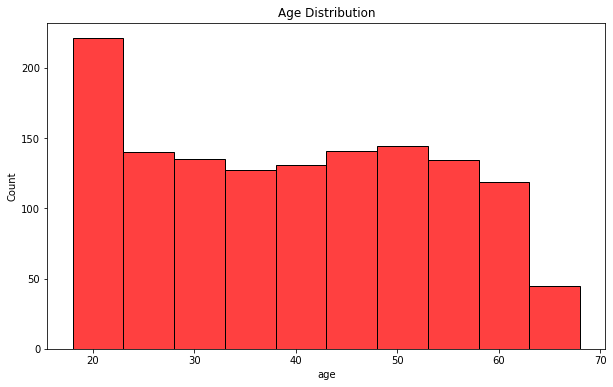

In [233]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="age",binwidth=5, color="red")
plt.title("Age Distribution")
plt.show()

### observation
- Most of people ages ranges from 18-23

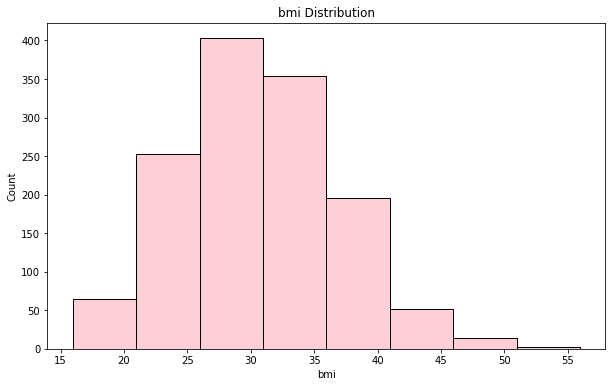

In [234]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="bmi",binwidth=5, color="pink")
plt.title("bmi Distribution")
plt.show()

### observation
- Most of people bmi ranges from 26.0-31.0 as their mean is 31.0
- The above observation declares that most of these people are overweight

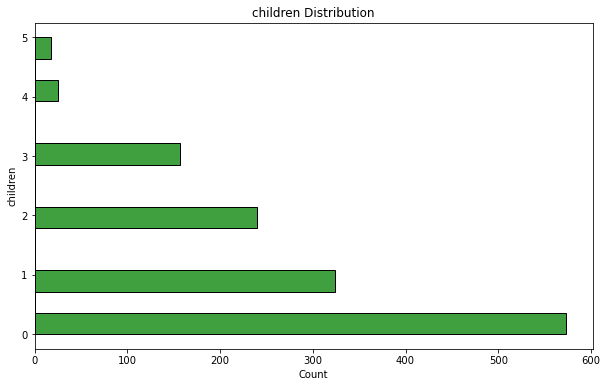

In [235]:
plt.figure(figsize=(10, 6))
sns.histplot(data, y="children", color="green")
plt.title("children Distribution")
plt.show()


In [236]:
data["children"].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### observation
- The greater percentageof people don't have children
- Most of them have only one child
- Lowest percentage have about 5 children

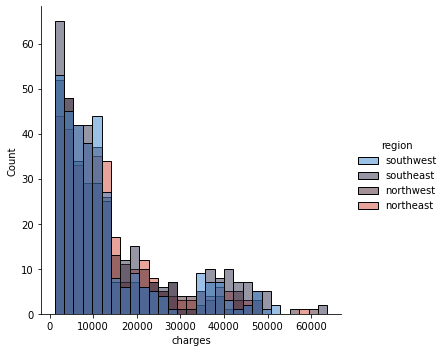

In [237]:
sns.displot(data= data, x="charges", palette= 'icefire', hue= 'region')

### observation
- The distribution is right-skewed.
- most of people charges range from 1100 to 10000.
- SouthEast is the most percentage that have insurance charge.

In [238]:
sex_count = data["sex"].value_counts()
sex_count

male      675
female    662
Name: sex, dtype: int64

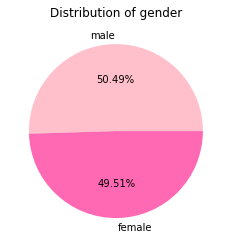

In [239]:
#colors = ['pink', 'lightpink']
colors = ['#FFC0CB', '#FF69B4']
plt.pie(labels=sex_count.index,x=sex_count.values, colors=colors,autopct = '%.2f%%')
plt.title("Distribution of gender")
plt.show()


### observation
- The distribution is slightly equal but men are more

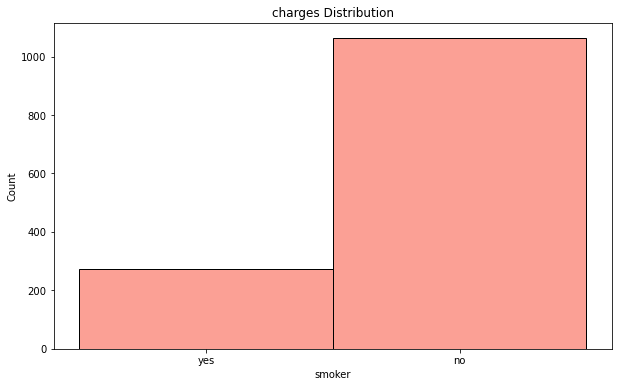

In [240]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="smoker", color="salmon")
plt.title("charges Distribution")
plt.show()

### observation
- Most of them don't smoke

In [241]:
region_count = data["region"].value_counts()
region_count

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

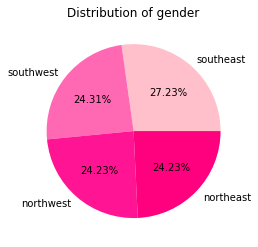

In [242]:
#colors = ['pink', 'lightpink']
colors = ['#FFC0CB', '#FF69B4', '#FF1493', '#FF007F'] 
plt.pie(labels=region_count.index,x=region_count.values, colors=colors,autopct = '%.2f%%')
plt.title("Distribution of gender")
plt.show()

### observation
- The distribution of regions is nearly equal

In [243]:
## Bivariante analysis

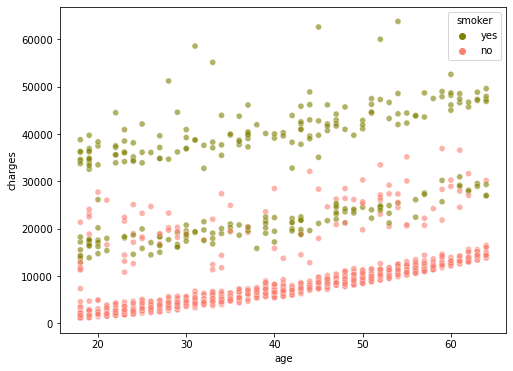

In [244]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['olive','salmon'] ,alpha=0.6)
plt.show()

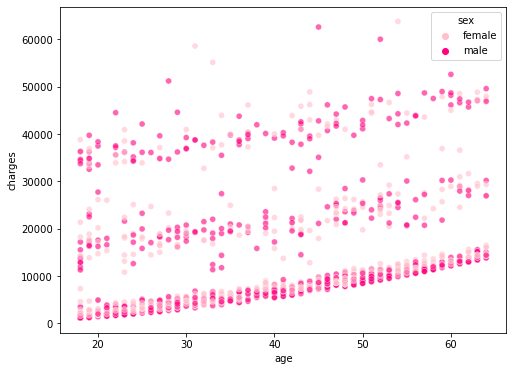

In [245]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['#FFC0CB', '#FF007F'] ,alpha=0.6)
plt.show()

<AxesSubplot:>

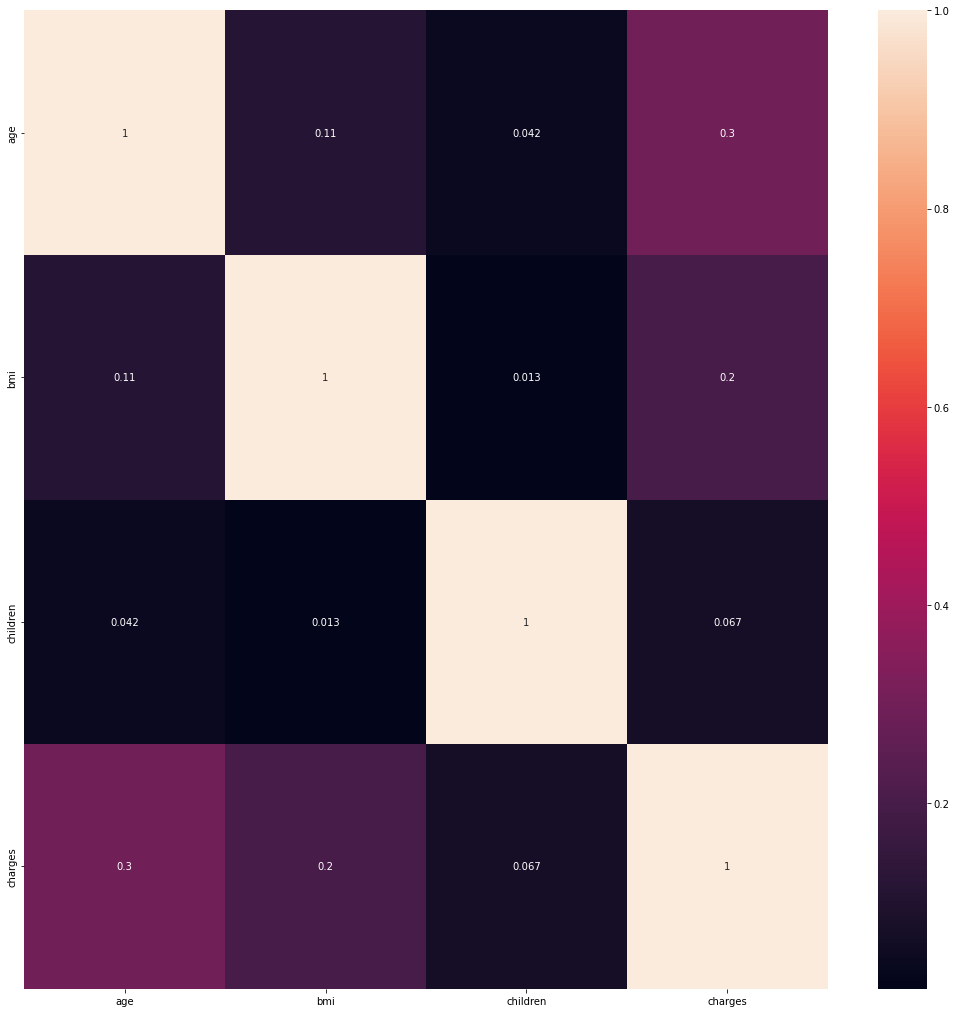

In [246]:
#let's check the correlation of data
plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot = True)

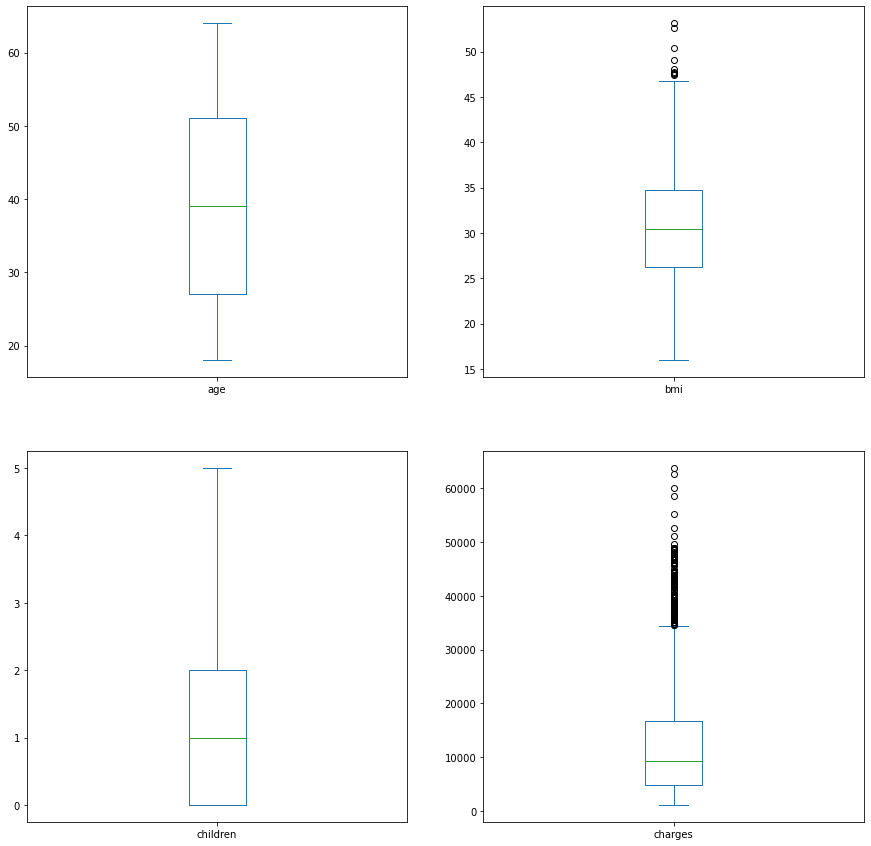

In [247]:
data.plot(kind = "box" , subplots = True , layout= (2,2), figsize =(15,15) )
plt.show()

In [248]:
# There are few outliers for bmi that we need to remove

Text(0.5, 1.0, 'Distributions of bmi delay before removing outliers')

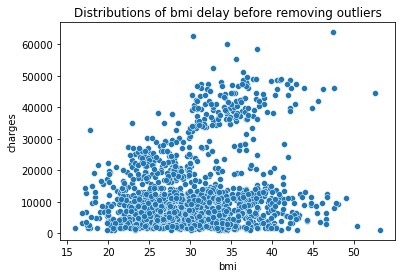

In [249]:
sns.scatterplot(x=data['bmi'],y=data['charges'])
plt.title('Distributions of bmi delay before removing outliers')

In [250]:
data[data['bmi']>=42].shape
data=data[data['bmi']<42]

Text(0.5, 1.0, 'Distributions of bmi delay after removing outliers')

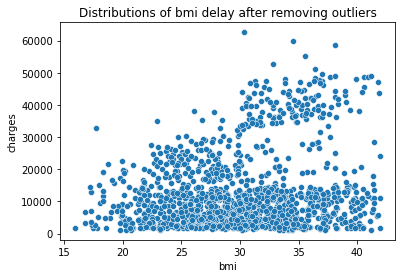

In [251]:
sns.scatterplot(x=data['bmi'],y=data['charges'])
plt.title('Distributions of bmi delay after removing outliers')

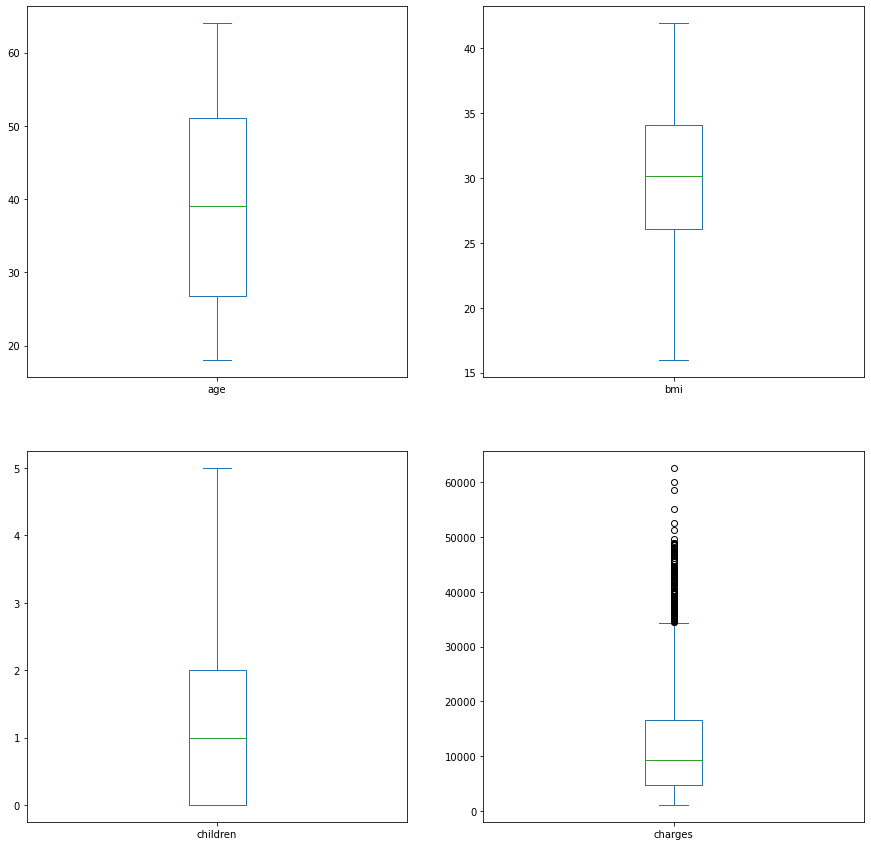

In [252]:
data.plot(kind = "box" , subplots = True , layout= (2,2), figsize =(15,15) )
plt.show()

## `Summary:` 
**Data preparation** 
  - No missing values.
  - Just one duplication is dropped.
  - just few outliers in bmi removed
    
    
**EDA**
  - Most of people ages ranges from 18-23.
  - Most of people bmi ranges from 26.0-31.0 as their mean is 31.0.
  - The mean od bmi declared that most of these people are overweight.
  - Most of people don't have children.
  - Most of them have only one child
  - Lowest percentage have about 5 children
  - The distribution of target (charges) is right-skewed.
  - most of people charges range from 1100 to 10000.
  - SouthEast is the most percentage that have insurance charge.
  - The distribution of gender is slightly equal but men are more.
  - Most of people don't smoke.
  - The distribution of regions is nearly equal.
  

In [253]:
# Change the categorical data to numerical data
def Encoding(data):
    # create the encoder variable
    le_encoder = LabelEncoder()
    # Extract the categoral data
    cat_df = data.select_dtypes(include=['object'])
    # Encode the categorecal data
    for i in cat_df:
        data[i] = le_encoder.fit_transform(data[i])
    return data

In [254]:
encoded_data = Encoding(data)
encoded_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [255]:
x = encoded_data.iloc[:,:-1].values
y = encoded_data.iloc[:,-1].values

In [256]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[-1.43640586, -1.00466929, -0.4034444 , -0.90117424,  1.98364964,
         1.35200278],
       [-1.50738302,  0.99535241,  0.66392361, -0.07031352, -0.50412128,
         0.45252986],
       [-0.79761139,  0.99535241,  0.52391111,  1.5914079 , -0.50412128,
         0.45252986],
       ...,
       [-1.50738302, -1.00466929,  1.22397361, -0.90117424, -0.50412128,
         0.45252986],
       [-1.29445153, -1.00466929, -0.78529668, -0.90117424, -0.50412128,
         1.35200278],
       [ 1.54463501, -1.00466929, -0.19069814, -0.90117424,  1.98364964,
        -0.44694307]])

In [257]:
# splitting the data before scaling
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.3,random_state=42)

# splitting the data after scaling
X_train_sc, X_test_sc, y_train, y_test = train_test_split( x_sc, y, test_size = 0.3,random_state=42)

In [258]:
# create object of LR class in sklearn
lr = LinearRegression()
# train the model using train data
lr.fit(X_train, y_train)

# get the predicted target values
y_pred = lr.predict(X_test)
# find the godness of fit
r2 = r2_score(y_test, y_pred)
# get the mean square error
mse = mean_squared_error(y_test, y_pred)
# get the root mean square error
rmse = np.sqrt(mse)

###################### with scaling ###################################
# create object of LR class in sklearn
lr_sc = LinearRegression()
# train the model using train data
lr_sc.fit(X_train_sc, y_train)

# get the predicted target values
y_pred_sc = lr_sc.predict(X_test_sc)
# find the godness of fit
r2_sc = r2_score(y_test, y_pred_sc)
# get the mean square error
mse_sc = mean_squared_error(y_test, y_pred_sc)
# get the root mean square error
rmse_sc = np.sqrt(mse_sc)

print("The R2 score:", r2)
print("the mean square error:", mse,)
print("the root mean square error:", rmse)
print("#############################################")
print("The R2 score with scaling:", r2_sc)
print("the mean square error with scaling:", mse_sc)
print("the root mean square error with scaling:", rmse_sc)

The R2 score: 0.7256797716385057
the mean square error: 40145059.371242456
the root mean square error: 6336.012892288214
#############################################
The R2 score with scaling: 0.7256797716385057
the mean square error with scaling: 40145059.371242456
the root mean square error with scaling: 6336.012892288214


In [259]:
predictions = pd.DataFrame({"Actual": y_pred, "Predicted": y_test})
predictions

,Actual,Predicted
0,15772.173845,10982.50130
1,22450.738248,20167.33603
2,11537.946286,20878.78443
3,29561.145305,37165.16380
4,23443.690370,14711.74380
...,...,...
382,10887.338191,9414.92000
383,33162.583294,40419.01910
384,2378.344694,3206.49135
385,11568.739613,10264.44210


In [260]:
# Plotting actual and predicted value of SKlearn LR

<Figure size 1080x720 with 0 Axes>

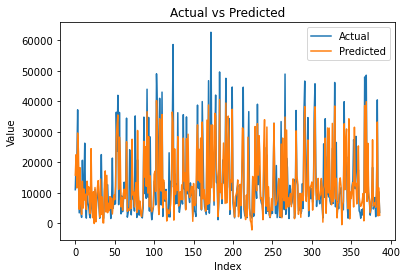

In [261]:
plt.figure(figsize=(15,10))
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
ax.plot(y_test, label='Actual')

# Plot the predicted values
ax.plot(y_pred, label='Predicted')

# Set the labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted')

# Show the legend
ax.legend()

### Scratch Multiple LR implementation

The prediction of the Miltiple LR model: 
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b 
    $$

The gradient descent algorithm is:
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{N} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{N} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

The total mean square error (difference between actual & predicted):
$$
MSE = \frac{1}{n} (yhat  - ytrue)^2
$$

The R2 Score (goodness of fit):
$$
R2 = 1 - \frac{SSR}{SST} = 1 - \frac{\sum\limits_{i = 0}^{N}(yhat  - ytrue)^2}{\sum\limits_{i = 0}^{N}(ytrue  - ybar)^2} 
$$


#### Intuation of linear regression class:
1.	Initialize the weights and Bias with zero
2.	Predict the target from a given data point through:
 $y = wx + b$
3.	 Calculate the error using mean square error
4.	Use gradient descent to find new weights and Bias with min error
5.	Repeat for n times until the derivative = 0, which corresponds to reaching the global minima of the function, but it is optional according to the user


In [262]:
class LinearRegressionScratch:
    # should initialize the model with number of learning iterations
    # also define the step during updating the Wieghts and Bais
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_history = []

    def cost_function(self, x, y):
        cost = np.sum((((x.dot(self.weight) + self.bais) - y) ** 2) / (2 * len(y)))
        return cost

    def GradientDescent(self, x, y):
        # get the number of samples needed in equation of derivatives 
        self.no_samples, self.no_features = x.shape
        # initialize the weight matrix with zeros at first
        self.weight = np.zeros(x.shape[1])
        # initialize the bais with zero at first
        self.bais = 0

        for itteration in range(self.iterations):
            # get the predicted point
            z = np.dot(x, self.weight) + self.bais
            # find the difference between predicted point and actual
            loss = z - y
            # find the derivative of wieght and bais according to euations
            # took the transpose of X from (columns x rows) to (rows x columns) 
            # as the dimension of W matrix = (rows x 1)
            # this will produce matrix = (columns x 1)
            dw = np.dot(x.T, loss) / self.no_samples
            db = np.sum(loss) / self.no_samples
            # update the weights and bais to decrease the error
            self.weight -= self.learning_rate * dw
            self.bais -= self.learning_rate * db
            
            # add the cost function of each iteration
            cost = self.cost_function(x, y)
            self.cost_history.append(cost)
            # print the cost after each cycle itteration
            if (itteration % (self.iterations / 10) == 0):
                print("Cost is:", cost)

        return self.weight, self.bais, self.cost_history
    
    # predict the values of target
    def predict(self, X):
        return X.dot(self.weight) + self.bais
    
    def r2score(self, y_pred, y):
        y_mean = y.mean()
        ssr = np.sum((y_pred - y) ** 2)
        sst = np.sum((y-y_mean) ** 2)
        r2 = 1 - (ssr / sst)
#         r2 = round(r2, 2)
        return r2
    
    def mse(self, y_pred, y):
        error = (1 / len(y)) * (np.sum((y_pred - y) ** 2))
#         error = round(error, 2)
        return error


Cost is: 154477700.50146413
Cost is: 118565023.41447785
Cost is: 92045488.24649052
Cost is: 72456754.76408055
Cost is: 57983426.00044623
Cost is: 47286684.92732073
Cost is: 39378898.009434104
Cost is: 33531288.69695764
Cost is: 29205939.11723067
Cost is: 26005694.55737014


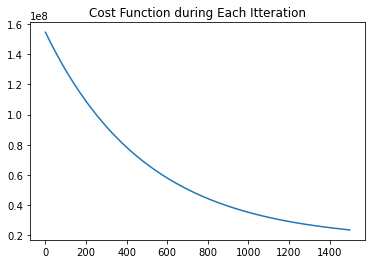

#######################################################
The Evaluation:
The R2 score: 0.6237260037434478
the mean square error: 55065359.23288946


In [263]:
### At small learning rate "0.001"
lr_scratch = LinearRegressionScratch(0.001, 1500)
w, b, c= lr_scratch.GradientDescent(X_train_sc, y_train)

#Plotting the cost function
plt.title("Cost Function during Each Itteration")
plt.plot(c)
plt.show()

# Prediction of new values
y_pred_scratch = lr_scratch.predict(X_test_sc)
r2_scratch = lr_scratch.r2score(y_pred_scratch, y_test)
mse_scratch = lr_scratch.mse(y_pred_scratch, y_test)

print("#######################################################")
print("The Evaluation:")
print("The R2 score:", r2_scratch)
print("the mean square error:", mse_scratch)

Cost is: 160931254.10327995
Cost is: 5216599959.50429
Cost is: 2894407715776.6777
Cost is: 1753558366095186.5
Cost is: 1.0632953592470397e+18
Cost is: 6.447543336076635e+20
Cost is: 3.9096228935801825e+23
Cost is: 2.37069389263635e+26
Cost is: 1.437527274170308e+29
Cost is: 8.716792457156425e+31


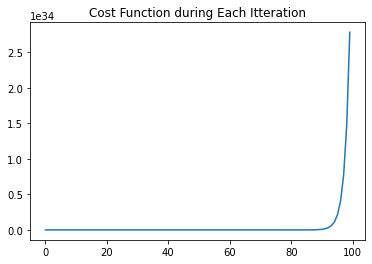

#######################################################
The Evaluation:
The R2 score: -3.813591337807896e+26
the mean square error: 5.58095374841281e+34


In [264]:
### At large learning rate "2"
lr_scratch = LinearRegressionScratch(2, 100)
w, b, c= lr_scratch.GradientDescent(X_train_sc, y_train)

#Plotting the cost function
plt.title("Cost Function during Each Itteration")
plt.plot(c)
plt.show()

# Prediction of new values
y_pred_scratch = lr_scratch.predict(X_test_sc)
r2_scratch = lr_scratch.r2score(y_pred_scratch, y_test)
mse_scratch = lr_scratch.mse(y_pred_scratch, y_test)

print("#######################################################")
print("The Evaluation:")
print("The R2 score:", r2_scratch)
print("the mean square error:", mse_scratch)

Cost is: 151989687.35617432
Cost is: 16865937.156825174
Cost is: 16865937.156790346
Cost is: 16865937.156790346
Cost is: 16865937.156790346
Cost is: 16865937.156790346
Cost is: 16865937.156790346
Cost is: 16865937.156790346
Cost is: 16865937.156790346
Cost is: 16865937.156790346


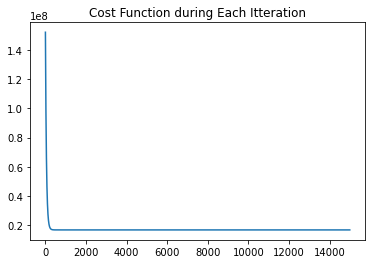

#######################################################
The Evaluation:
The R2 score: 0.7256797716385055
the mean square error: 40145059.371242486


In [265]:
### At suitable learningrate and itterations "0.01"
lr_scratch = LinearRegressionScratch(0.01, 15000)
w, b, c= lr_scratch.GradientDescent(X_train_sc, y_train)

#Plotting the cost function
plt.title("Cost Function during Each Itteration")
plt.plot(c)
plt.show()

# Prediction of new values
y_pred_scratch = lr_scratch.predict(X_test_sc)
r2_scratch = lr_scratch.r2score(y_pred_scratch, y_test)
mse_scratch = lr_scratch.mse(y_pred_scratch, y_test)

print("#######################################################")
print("The Evaluation:")
print("The R2 score:", r2_scratch)
print("the mean square error:", mse_scratch)

<Figure size 1080x720 with 0 Axes>

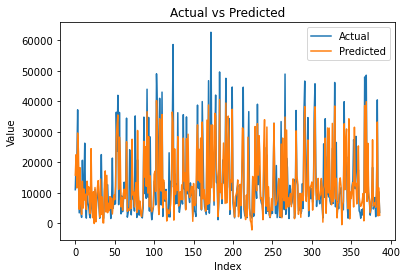

In [266]:
#### Plotting the actual and predicted value of scratch LR
plt.figure(figsize=(15,10))
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
ax.plot(y_test, label='Actual')

# Plot the predicted values
ax.plot(y_pred_scratch, label='Predicted')

# Set the labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted')

# Show the legend
ax.legend()